# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.gridspec as gridspec
# omsky_gamedev

# Загрузка датасета для регрессии.

In [2]:
models = pd.read_csv('../Data/energy_task_moded_removed_nan.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11,1,2016,1020
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11,1,2016,1030
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11,1,2016,1040
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11,1,2016,1050
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11,1,2016,1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27,5,2016,1040
18534,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27,5,2016,1050
18535,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27,5,2016,1060
18536,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27,5,2016,1070


# Разбиваем на выборку

In [3]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.5)


# <b>Линейная регресия</b>

## Обычная линейная регресия (без гиппер параметра).

### Обуение

In [4]:
line_regression_classic = LinearRegression().fit(X_train, y_train)
line_regression_classic.predict(X_test)

array([151.64698013,  58.00717904,  88.4026748 , ...,  61.28024786,
        87.96652451,  52.04275388])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [5]:
y_predicted = line_regression_classic.predict(X_test)
line_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, y_test), 
                          'RMSE': mean_squared_error(y_predicted, y_test),
                          'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                          'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                          'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {line_regression_classic.score(X_test, y_test)}',
      sep='\n')


MAE: 53.47684856304131
RMSE: 9090.999419043768
MSE: 95.34673260811704
MAPE: 0.5803000219803351
R^2: 0.15835668283012538


### Значение весов.

In [6]:
print(len(line_regression_classic.coef_), line_regression_classic.coef_, sep='\n')


29
[ 1.71626208e+00 -7.71578537e+00  1.44052297e+01 -1.67842153e+01
 -1.33693436e+01  2.95403140e+01  3.68119930e+00  1.04938760e-01
 -8.54386064e-01 -5.33300827e-02 -6.37984167e-02  7.08772567e+00
 -8.54423114e-02 -1.78103774e-01 -1.31354568e+00  8.74282277e+00
 -3.44141610e+00 -9.80140922e+00 -1.26199409e+00 -6.05463595e+00
  2.02448448e-01  3.42660450e-01  1.92772632e+00  1.16118455e-01
  8.90790424e-01 -3.13532767e-01 -1.72812390e+01  0.00000000e+00
  1.47882776e-02]


### Предварительные результаты

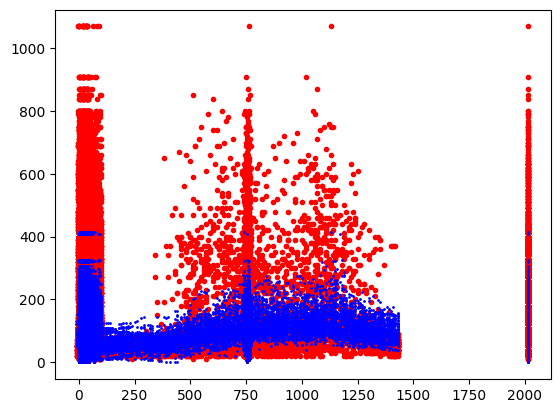

In [7]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)

## Ridge (линейная регрессия + L2)

### Ridge - подборка гиппер параметра $\alpha$

In [8]:
ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
ridge_optimal_for_line_regression.best_params_

{'alpha': 58}

In [9]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(a, b, i)}).fit(X_train, y_train)
    if (ridge_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (ridge_optimal_for_line_regression.best_params_['alpha'] != b):
        a = ridge_optimal_for_line_regression.best_params_['alpha']-i
        b = ridge_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

ridge_optimal_for_line_regression.best_params_['alpha']  


    

57.59899999999997

### Ridge - обучение с подобранным гиппер параметрам $\alpha$

In [10]:
line_regression_ridge = Ridge(alpha=ridge_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_result = line_regression_ridge.predict(X_test)
line_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                'RMSE': mean_squared_error(y_predicted, y_test),
                                'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {ridge_optimal_for_line_regression.score(X_test, y_test)}',
      sep='\n')
line_regression_ridge.coef_

MAE: 53.40899942215833
RMSE: 9086.519757517972
MSE: 95.3232382869884
MAPE: 0.5736551313381228
R^2: 0.15877140919986554


array([ 1.72878749e+00, -7.52005958e+00,  1.42109256e+01, -1.60717045e+01,
       -1.30330080e+01,  2.88603215e+01,  3.71106588e+00, -9.10774008e-02,
       -9.22319257e-01, -2.15280158e-01, -6.33624889e-02,  6.98227587e+00,
       -7.66774821e-02, -2.37692173e-01, -1.34005115e+00,  8.52542316e+00,
       -3.41332610e+00, -9.53868163e+00, -1.21686616e+00, -5.89212252e+00,
        1.94151315e-01,  3.45236024e-01,  1.94858581e+00,  1.15195958e-01,
        7.10484121e-01, -2.82150873e-01, -1.63434388e+01,  0.00000000e+00,
        1.48994063e-02])

## Lasso (линейная регрессия + L1)

### Lasso - подборка гиппер параметра $\alpha$

In [11]:
lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.162e+07, tolerance: 7.643e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

In [12]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
    if (lasso_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (lasso_optimal_for_line_regression.best_params_['alpha'] != b):
        a = lasso_optimal_for_line_regression.best_params_['alpha']-i
        b = lasso_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.162e+07, tolerance: 7.643e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

### Lasso - обучение с подобранным гиппер параметрам $\alpha$

In [13]:
line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_predict = line_regression_lasso.predict(X_test)
line_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                               'RMSE': mean_squared_error(y_predicted, y_test),
                               'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                               'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                               'R^2': line_regression_lasso.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {line_regression_lasso.score(X_test, y_test)}',
      sep='\n')
line_regression_lasso.coef_

MAE: 53.47685066079924
RMSE: 9090.998887503296
MSE: 95.34672982070909
MAPE: 0.580297099775541
R^2: 0.15835673204005996


C:\Users\Mike\AppData\Local\Temp\ipykernel_8372\3665724445.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.909e+07, tolerance: 9.472e+03 Linear regression models with null weight for the l1 regularization term

array([ 1.71626204e+00, -7.71570156e+00,  1.44052316e+01, -1.67842868e+01,
       -1.33693696e+01,  2.95402983e+01,  3.68121079e+00,  1.04930933e-01,
       -8.54388991e-01, -5.33026878e-02, -6.37990673e-02,  7.08780688e+00,
       -8.54367707e-02, -1.78083062e-01, -1.31354434e+00,  8.74282035e+00,
       -3.44140672e+00, -9.80144139e+00, -1.26198977e+00, -6.05495689e+00,
        2.02449223e-01,  3.42604039e-01,  1.92771918e+00,  1.16118923e-01,
        8.91036278e-01, -3.13533051e-01, -1.72811538e+01,  0.00000000e+00,
        1.47882974e-02])

# <b>Полиномиальная регрессия</b>

In [14]:
power = 2

## Обычная полиномиальная регрессия (без гиппер параметра).

In [15]:
polynomial_regression_classic = LinearRegression().fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_predicted = polynomial_regression_classic.predict(PolynomialFeatures(power).fit_transform(X_test))
polynomial_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                        'RMSE': mean_squared_error(y_predicted, y_test),
                                        'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                        'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                        'R^2': polynomial_regression_classic.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {polynomial_regression_classic.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_classic.coef_

MAE: 53.47685066079924
RMSE: 9090.998887503296
MSE: 95.34672982070909
MAPE: 0.580297099775541
R^2: 0.3023199689169298


array([ 8.49102605e-10, -2.11724943e-06,  5.46647587e-04,  6.53985878e-05,
       -7.98717678e-05, -5.03658281e-05, -4.38369046e-05,  1.13780461e-04,
       -9.41503750e-05, -7.95230301e-05,  2.59134698e-05, -1.08650698e-05,
        5.29679721e-05,  1.42812820e-05, -5.87634069e-04,  1.04690340e-04,
        9.13781181e-05, -7.48927794e-05,  8.16198673e-05,  7.46556906e-05,
        1.34369926e-04, -1.31730385e-05,  8.97273781e-06, -4.02000058e-05,
       -2.43369537e-08, -2.67310431e-04,  3.21784440e-05,  7.00723169e-04,
        2.72943696e-09, -1.00053595e-07, -3.15261496e-02,  8.38698684e-02,
        1.47834415e-01, -4.26491236e-01, -4.01716764e-01,  3.46423935e-02,
       -2.28744109e-01, -2.38979126e-01,  9.93947708e-02, -2.10800777e-01,
       -2.37621959e-02,  1.56330337e-01, -2.03772338e-03,  8.26760648e-01,
        2.16460439e-01, -8.14401875e-01,  8.28618437e-02,  6.59891357e-01,
       -8.13677758e-02, -7.54828190e-01,  5.07601338e-02, -1.19339106e-01,
        5.09960252e-02, -

## Ridge (Полиномиальная регрессия + L1)

### Ridge (полиномиальная регрессия) - подборка гиппер параметра $\alpha$

In [16]:
ridge_optimal_for_polynomial_regression = GridSearchCV(Ridge(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
ridge_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.51047e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.52489e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.49427e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.52888e-17): result may not be

{'alpha': 2}

In [17]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    ridge_optimal_for_polynomial_regression = GridSearchCV(Ridge(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
    if (ridge_optimal_for_polynomial_regression.best_params_['alpha'] == 0):
        break
    elif (ridge_optimal_for_polynomial_regression.best_params_['alpha'] != b):
        a = ridge_optimal_for_polynomial_regression.best_params_['alpha']-i
        b = ridge_optimal_for_polynomial_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

ridge_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.51047e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.52489e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.49427e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.52888e-17): result may not be

{'alpha': 2}

### Ridge (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [18]:
polynomial_regression_ridge = Ridge(alpha=ridge_optimal_for_polynomial_regression.best_params_['alpha']).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_result = polynomial_regression_ridge.predict(PolynomialFeatures(power).fit_transform(X_test))
polynomial_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                      'RMSE': mean_squared_error(y_predicted, y_test),
                                      'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                      'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                      'R^2': polynomial_regression_ridge.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {polynomial_regression_ridge.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_ridge.coef_

MAE: 49.71675615709757
RMSE: 7535.085954924325
MSE: 86.80487287545743
MAPE: 0.7385540288621836
R^2: 0.3024029101819362


array([ 0.00000000e+00, -2.06529564e-06,  5.42059933e-04,  6.49859290e-05,
       -7.68574248e-05, -4.94087622e-05, -4.23390024e-05,  1.12754452e-04,
       -9.43378870e-05, -7.82624681e-05,  2.36468853e-05, -1.07996707e-05,
        5.32410035e-05,  1.44778133e-05, -5.78187349e-04,  1.03219415e-04,
        9.00546574e-05, -7.47194747e-05,  7.12272544e-05,  7.46935984e-05,
        1.27682379e-04, -1.33487192e-05,  7.56438027e-06, -4.03890941e-05,
        1.35697799e-07, -2.60580469e-04,  3.23518177e-05,  7.08087143e-04,
        0.00000000e+00, -3.02168475e-07, -3.15278540e-02,  9.04830240e-02,
        1.48911192e-01, -4.34005039e-01, -4.04033342e-01,  3.16297334e-02,
       -2.29023687e-01, -2.38318892e-01,  1.00535645e-01, -2.07293860e-01,
       -2.35847928e-02,  1.56760953e-01, -2.18663994e-03,  8.21864652e-01,
        2.16754879e-01, -8.12828385e-01,  8.11610968e-02,  6.58710363e-01,
       -7.93832567e-02, -7.64444976e-01,  5.07243578e-02, -1.20911213e-01,
        5.05051850e-02, -

## Lasso (Полиномиальная регрессия + L1)

### Lasso (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [19]:
lasso_optimal_for_polynomial_regression = GridSearchCV(Lasso(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
lasso_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.780e+07, tolerance: 7.643e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+07, tolerance: 7.534e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

{'alpha': 1}

In [20]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    lasso_optimal_for_polynomial_regression = GridSearchCV(Lasso(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
    if (lasso_optimal_for_polynomial_regression.best_params_['alpha'] == 0):
        break
    elif (lasso_optimal_for_polynomial_regression.best_params_['alpha'] != b):
        a = lasso_optimal_for_polynomial_regression.best_params_['alpha']-i
        b = lasso_optimal_for_polynomial_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

lasso_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.780e+07, tolerance: 7.643e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+07, tolerance: 7.534e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

{'alpha': 1}

### Lasso (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [21]:
polynomial_regression_lasso = Ridge(alpha=lasso_optimal_for_polynomial_regression.best_params_['alpha']).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_result = polynomial_regression_lasso.predict(PolynomialFeatures(power).fit_transform(X_test))
polynomial_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                      'RMSE': mean_squared_error(y_predicted, y_test),
                                      'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                      'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                      'R^2': polynomial_regression_lasso.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {polynomial_regression_lasso.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_lasso.coef_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.01249e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE: 49.727745535255835
RMSE: 7535.512852188436
MSE: 86.80733178821036
MAPE: 0.7447056205792402
R^2: 0.3023633880993911


array([ 0.00000000e+00, -2.11140675e-06,  5.44419041e-04,  6.54232607e-05,
       -7.84193449e-05, -4.99679364e-05, -4.28773207e-05,  1.13467873e-04,
       -9.43235274e-05, -7.88924117e-05,  2.49380352e-05, -1.09590969e-05,
        5.34886648e-05,  1.65831430e-05, -5.82869775e-04,  1.03663625e-04,
        9.07411558e-05, -7.48415965e-05,  7.62771665e-05,  7.47184682e-05,
        1.31242139e-04, -1.33471006e-05,  8.22300806e-06, -4.02287030e-05,
       -1.13398888e-07, -2.63918104e-04,  3.19574729e-05,  7.04572249e-04,
        0.00000000e+00, -3.58690893e-06, -3.15284105e-02,  8.72630172e-02,
        1.48401201e-01, -4.30349204e-01, -4.02910444e-01,  3.31187116e-02,
       -2.28902671e-01, -2.38630756e-01,  9.99776944e-02, -2.09003313e-01,
       -2.36716880e-02,  1.56547077e-01, -2.11468464e-03,  8.24270048e-01,
        2.16606044e-01, -8.13583776e-01,  8.19911282e-02,  6.59239572e-01,
       -8.03453165e-02, -7.59839198e-01,  5.07431897e-02, -1.20158829e-01,
        5.07473007e-02, -

# Compared

Text(0.5, 1.0, 'polynomial_regression + L2')

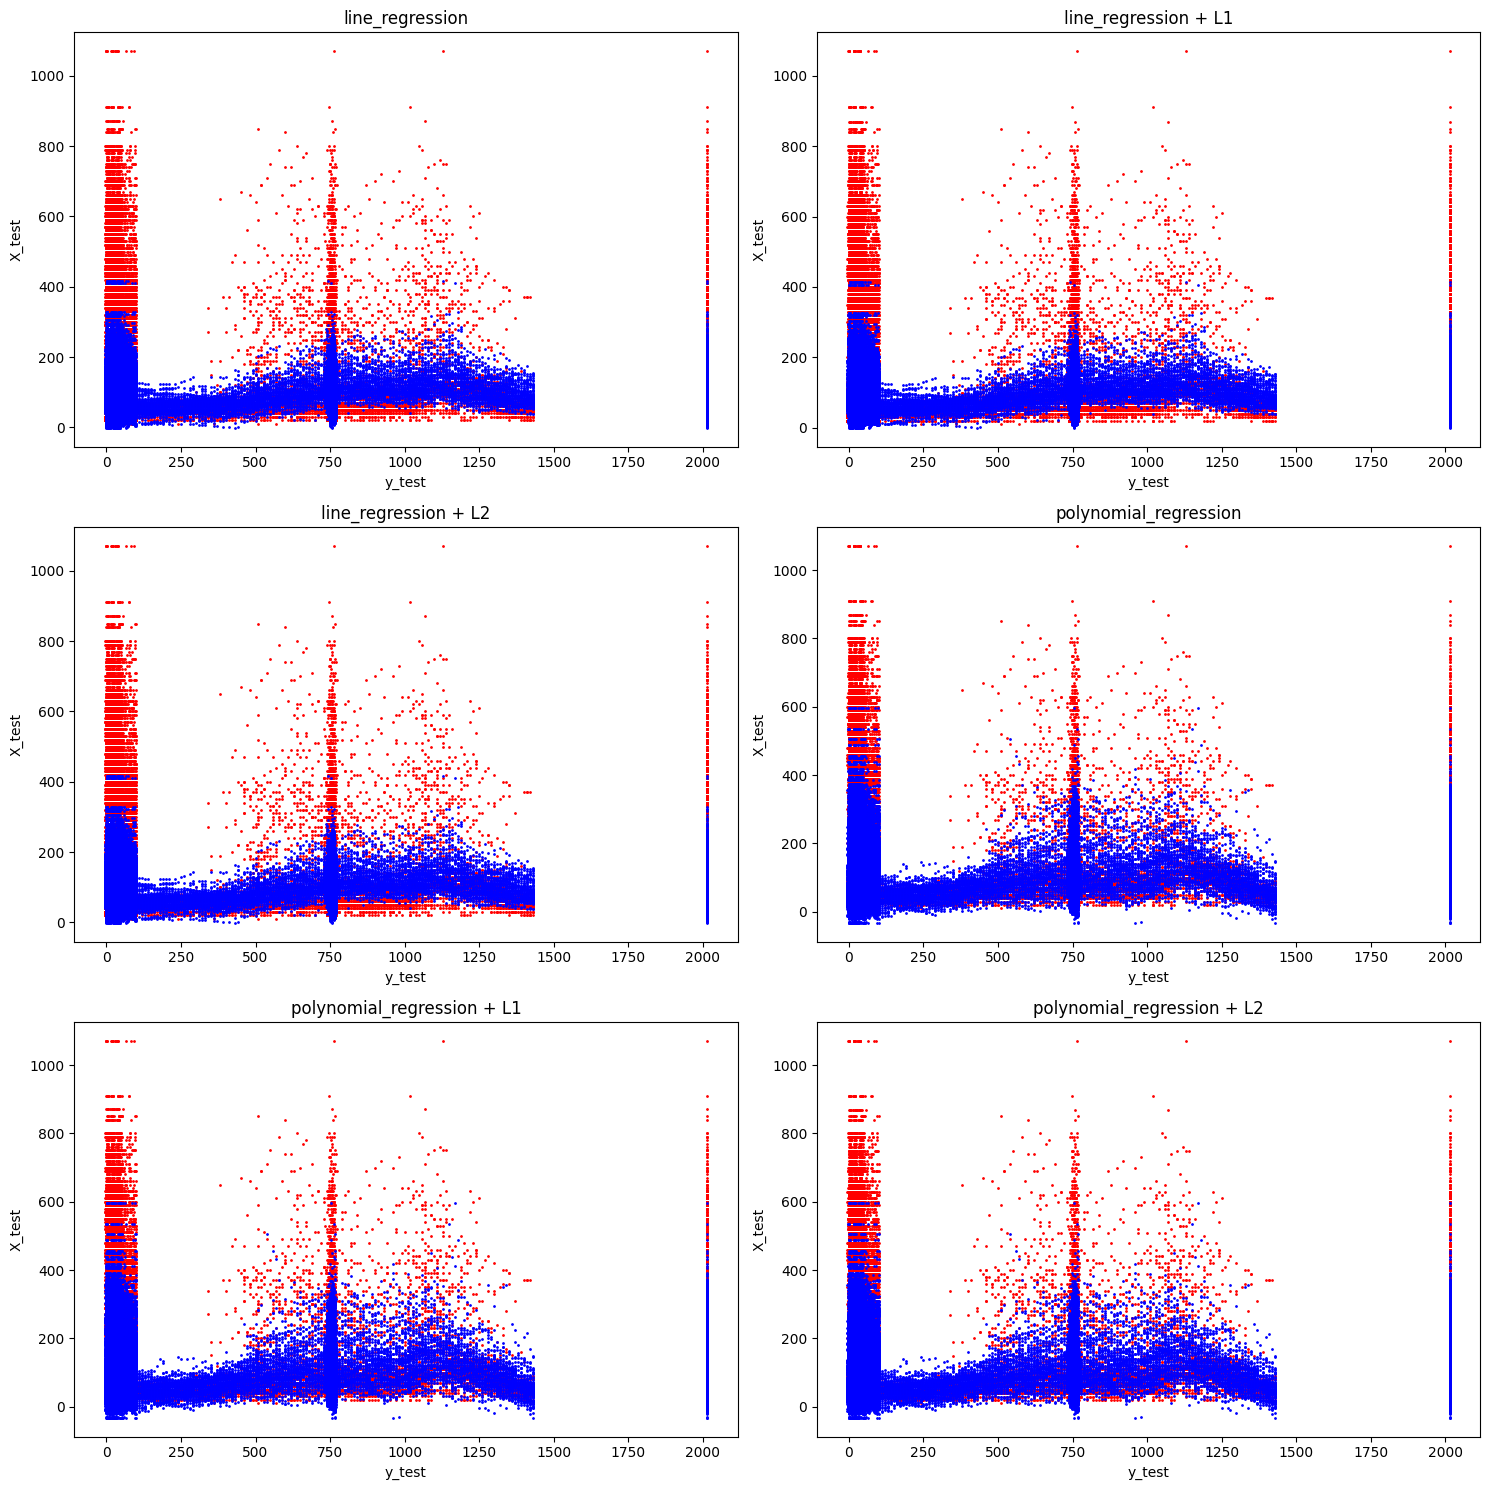

In [22]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
gs = gridspec.GridSpec(3, 2)
ax = fig.add_subplot(gs[0, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression')
#--------------------------------
ax = fig.add_subplot(gs[0, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_ridge.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression + L1')
#--------------------------------
ax = fig.add_subplot(gs[1, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_lasso.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression + L2')
#--------------------------------
ax = fig.add_subplot(gs[1, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_classic.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression')

#--------------------------------
ax = fig.add_subplot(gs[2, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_ridge.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression + L1')

#--------------------------------
ax = fig.add_subplot(gs[2, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_lasso.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression + L2')

In [23]:
results_errors = {'line_regression_ridge_errors': line_regression_ridge_errors, 
                  'line_regression_classic_errors': line_regression_classic_errors,
                  'line_regression_lasso_errors': line_regression_classic_errors,
                  'polynomial_regression_classic_errors': polynomial_regression_classic_errors,
                  'polynomial_regression_lasso_errors': polynomial_regression_lasso_errors,
                  'polynomial_regression_ridge_errors': polynomial_regression_ridge_errors}
pd.DataFrame(results_errors)

,line_regression_ridge_errors,line_regression_classic_errors,line_regression_lasso_errors,polynomial_regression_classic_errors,polynomial_regression_lasso_errors,polynomial_regression_ridge_errors
MAE,53.476849,53.476849,53.476849,49.739288,49.739288,49.739288
RMSE,9090.999419,9090.999419,9090.999419,7535.981844,7535.981844,7535.981844
MSE,95.346733,95.346733,95.346733,86.810033,86.810033,86.810033
MAPE,0.580300,0.580300,0.580300,0.765524,0.765524,0.765524
R^2,0.158357,0.158357,0.158357,0.302320,0.302363,0.302403
